# Step 1: Import libraries and Datasets

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [13]:
train_labels.shape

(50000, 1)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [18]:
test_labels.shape

(10000, 1)

# Step 2: Data Visualization

[8]


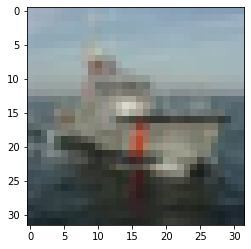

In [17]:
import random
i = random.randint(0, 50000) 
plt.imshow(train_images[i])
print(train_labels[i])

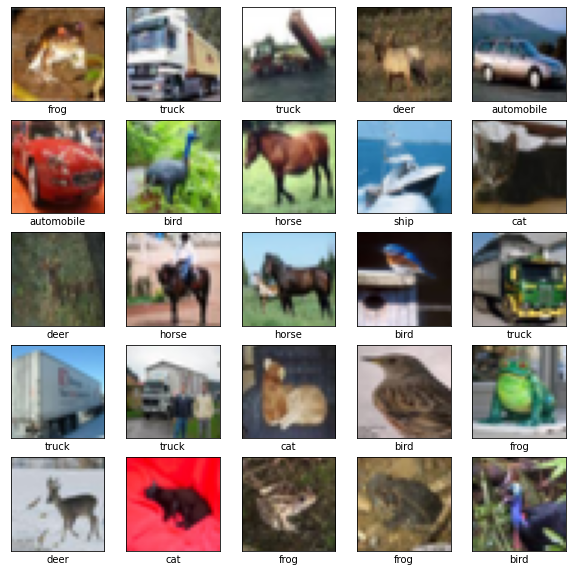

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # সিফারের লেবেলগুলো যেহেতু অ্যারে, সেকারণে আমাদের 
    # বাড়তি ইনডেক্স দরকার পড়ছে
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Step 3: Data Preparation

In [5]:
train_images, test_images = train_images/255, test_images/255

In [6]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [7]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Step 4: Train the model


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [9]:
model = Sequential()


In [10]:
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), 
                 activation = 'relu'))


In [11]:
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

In [12]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

In [13]:
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

In [14]:
model.add(Flatten())


In [15]:
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

In [16]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1 )

Epoch 1/10
352/352 [==============================] - 23s 67ms/step - loss: 1.6585 - accuracy: 0.3956 - val_loss: 1.3743 - val_accuracy: 0.5064
Epoch 2/10
352/352 [==============================] - 24s 68ms/step - loss: 1.3158 - accuracy: 0.5290 - val_loss: 1.2190 - val_accuracy: 0.5622
Epoch 3/10
352/352 [==============================] - 24s 67ms/step - loss: 1.1715 - accuracy: 0.5828 - val_loss: 1.1489 - val_accuracy: 0.5920
Epoch 4/10
352/352 [==============================] - 24s 68ms/step - loss: 1.0789 - accuracy: 0.6197 - val_loss: 1.0910 - val_accuracy: 0.6124
Epoch 5/10
352/352 [==============================] - 24s 67ms/step - loss: 1.0094 - accuracy: 0.6454 - val_loss: 1.0486 - val_accuracy: 0.6330
Epoch 6/10
352/352 [==============================] - 23s 66ms/step - loss: 0.9492 - accuracy: 0.6697 - val_loss: 1.0194 - val_accuracy: 0.6476
Epoch 7/10
352/352 [==============================] - 23s 67ms/step - loss: 0.9107 - accuracy: 0.6815 - val_loss: 0.9674 - val_accuracy:

# Step 5: Evaluate the model

In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9768 - accuracy: 0.6665


In [19]:
print('accuracy in test data: ', test_accuracy)

accuracy in test data:  0.6664999723434448


In [20]:
predictions= model.predict(test_images)

In [21]:
np.argmax(predictions[1])

8

In [22]:
print(test_labels[1])

[8]


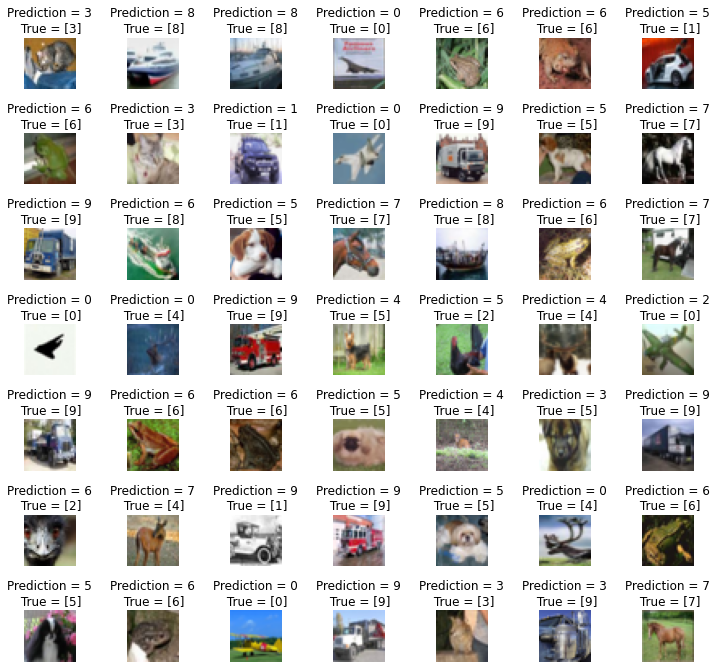

In [23]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(test_images[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(np.argmax(predictions[i]), test_labels[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

# STEP 7: IMPROVING THE MODEL WITH DATA AUGMENTATION

1) image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 

2) Augmentations also include shifting and changing the brightness of the images.



In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                    rotation_range = 90, 
                    width_shift_range = 0.1, 
                    horizontal_flip = True, 
                    vertical_flip = True)

In [27]:
datagen.fit (train_images)

In [30]:
model.fit_generator(datagen.flow(train_images, train_labels, batch_size=128), epochs=50)

Epoch 1/50
391/391 [==============================] - 34s 88ms/step - loss: 1.1426 - accuracy: 0.5934
Epoch 2/50
391/391 [==============================] - 34s 88ms/step - loss: 1.1411 - accuracy: 0.5962
Epoch 3/50
391/391 [==============================] - 35s 89ms/step - loss: 1.1350 - accuracy: 0.5973
Epoch 4/50
391/391 [==============================] - 34s 88ms/step - loss: 1.1345 - accuracy: 0.5979
Epoch 5/50
391/391 [==============================] - 35s 90ms/step - loss: 1.1217 - accuracy: 0.6021
Epoch 6/50
391/391 [==============================] - 35s 90ms/step - loss: 1.1220 - accuracy: 0.6016
Epoch 7/50
391/391 [==============================] - 35s 90ms/step - loss: 1.1194 - accuracy: 0.6054
Epoch 8/50
391/391 [==============================] - 35s 90ms/step - loss: 1.1143 - accuracy: 0.6070
Epoch 9/50
391/391 [==============================] - 37s 94ms/step - loss: 1.1067 - accuracy: 0.6070
Epoch 10/50
391/391 [==============================] - 35s 90ms/step - loss: 1.101

# Save model

In [ ]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_trained_model_augmentatio.h5')
model.save(model_path)